In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
import numpy as np

In [2]:
# Define the diffusion model architecture
input_layer = Input(shape=(1, 28, 28))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(784, activation='sigmoid')(x)
output_layer = Reshape((1, 28, 28))(x) 

diffusion_model = Model(input_layer,output_layer)

# Compile the model
diffusion_model.compile(optimizer = 'adam', loss='binary_crossentropy')

# Summary of the model
diffusion_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1, 28, 28)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 1, 28, 32)      │         8,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 1, 28, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       229,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 28, 28)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,232 (1.36 MB)

 Trainable params: 357,232 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

# Training the diffusion Model

In [3]:
from tensorflow.keras.datasets import mnist

# Load the dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = np.expand_dims(x_train, axis=1)
x_test = np.expand_dims(x_test, axis=1)


# Add noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0, scale=1, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0, scale=1, size = x_test.shape)

In [4]:
# Train the model
diffusion_model.fit(x_train_noisy, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test_noisy,x_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.2714 - val_loss: 0.1316
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1279 - val_loss: 0.1157
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1151 - val_loss: 0.1094
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1098 - val_loss: 0.1062
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1063 - val_loss: 0.1040
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1042 - val_loss: 0.1025
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1024 - val_loss: 0.1014
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1012 - val_loss: 0.1003
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1000 - val_loss: 0.0996
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0993 - val_loss: 0.0988
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0987 - val_loss: 0.0985
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


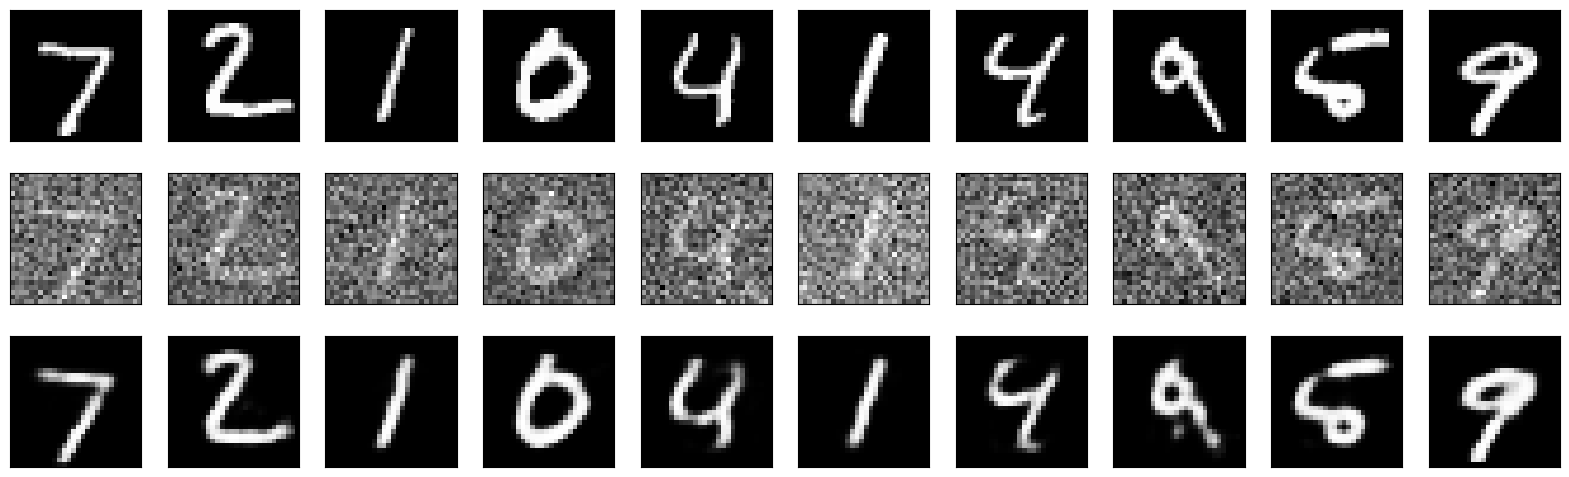

In [12]:
import matplotlib.pyplot as plt

# Predict the denoised images

denoised_images = diffusion_model.predict(x_test_noisy)

# Visualize the results
n = 10 #Number of digits to display
plt.figure(figsize=(20,6))
for i in range(n):
    # Displau original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28), cmap = 'grey')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy
    ax = plt.subplot(3, n, i + 1 +n)
    plt.imshow(x_test_noisy[i].reshape(28,28), cmap = 'grey')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoisy
    ax = plt.subplot(3, n, i + 1 + 2 *n)
    plt.imshow(denoised_images[i].reshape(28,28), cmap = 'grey')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Fine-tunning the diffusion model

In [13]:
# Unfreeze the top layers of the model
for layer in diffusion_model.layers[-4:]:
    layer.trainable = True

# Compile the model again
diffusion_model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model again
diffusion_model.fit(x_train_noisy, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test_noisy,x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0933 - val_loss: 0.0963
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0932 - val_loss: 0.0958
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0930 - val_loss: 0.0957
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0930 - val_loss: 0.0958
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0929 - val_loss: 0.0957
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0930 - val_loss: 0.0957
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0929 - val_loss: 0.0958
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0929 - val_loss: 0.0957
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0931 - val_loss: 0.0957
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0929 - val_loss: 0.0956
